# Classification of Hate Speech in Tweets using C-Support Vector Machine

## Preparation

### Importing Libraries

In [27]:
import os
import sys
sys.path.append("../data")
from preprocessing import load_data, preprocess, train_tfidf, split_data, upsampling, get_features, setup
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.plotting import plot_confusion_matrix

### Loading Data

In [ ]:
# pre- processing
tfidf, df_train, df_test = setup()

## Setup Training Function (with GridSearch)

Parameter "class_weight = 'balanced' " has proven very useful, however it does have a similar effect as upsamling; therefore left out of analysis for comparability.

In [4]:
param_grid={'C': [i for i in range (1, 3000, 50)],
            'kernel': ["linear", "rbf"],
            'class_weight': [None],
            'gamma': ['scale', 0.00003, 0.0003, 0.003, 0.03, 0.3, 1, 3, 8]
            }

In [6]:
def train_svm(df_train: pd.DataFrame, tfidf: TfidfVectorizer):

    X_train = tfidf.transform(df_train['preprocessed'])
    y_train = df_train['label']

    # C-Support  Support Vector Machine
    svm_grid = GridSearchCV(svm.SVC(random_state=55), param_grid=param_grid, verbose=10, n_jobs=-1, scoring='f1', cv=5)
    svm_grid.fit(X_train, y_train);
    
    return svm_grid.best_estimator_

### Setup Testing Function

In [7]:
def test_model(model, df_test: pd.DataFrame, tfidf: TfidfVectorizer):
    
    X_test = tfidf.transform(df_test['preprocessed'])
    y_test = df_test['label']
    y_pred = model.predict(X_test)

    predictions = []

    predictions.append(model.get_params())
    predictions.append(precision_score(y_test, y_pred))
    predictions.append(recall_score(y_test, y_pred))
    predictions.append(accuracy_score(y_test, y_pred))
    predictions.append(f1_score(y_test, y_pred))

    return predictions

### Setup Result List

In [8]:
results = []

### Only Tokenization

In [ ]:
# Don't Remove Stopwords, No Emojis, No Stemming, No Upsampling 
tfidf, df_train, df_test = setup(rem_stop=False, do_stem=False, do_lem=False, split=True, upsample=False, do_emojis=False)
svm_cv = train_svm(df_train, tfidf)
results.append("Only Tokenization \n")
results.append(test_model(svm_cv, df_test, tfidf))

### Removing Stopwords

In [10]:
# Remove Stopwords, No Emojis, No Stemming, No Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=False, do_lem=False, split=True, upsample=False, do_emojis=False)
svm_cv = train_svm(df_train, tfidf)
results.append("\n\nRemove Stopwords \n")
results.append(test_model(svm_cv, df_test, tfidf))

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\Mayte\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)


  0%|          | 0/1 [00:00<?, ?it/s]

There is 25569 training data, of which 7.02% is hate speech 
There is 6393 test data, of which 7.01% is hate speech 
Fitting 5 folds for each of 1 candidates, totalling 5 fits


KeyboardInterrupt: 

### Emojis

In [ ]:
# Remove Stopwords, Emojis, No Stemming, No Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=False, do_lem=False, split=True, upsample=False, do_emojis=True)
svm_cv = train_svm(df_train, tfidf)
results.append("\n\nEmojis \n")
results.append(test_model(scm_cv, df_test, tfidf))

### Stemming

In [ ]:
# Remove Stopwords, Emojis, Stemming, No Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=True, do_lem=False, split=True, upsample=False, do_emojis=True)
svm_cv = train_svm(df_train, tfidf)
results.append("\n\nStemming \n")
results.append(test_model(svm_cv, df_test, tfidf))

### Upsampling

In [ ]:
# Remove Stopwords, Emojis, Stemming, Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=True, do_lem=False, split=True, upsample=True, do_emojis=True)
svm_cv = train_svm(df_train, tfidf)
results.append("\n\nUpsampling \n")
results.append(test_model(model, df_test, tfidf))

### All-but-Stemming

In [ ]:
# Remove Stopwords, Emojis, No Stemming, Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=False, do_lem=False, split=True, upsample=True, do_emojis=True)
svm_cv = train_svm(df_train, tfidf)
results.append("\n\nAll-but-Stemming \n")
results.append(test_model(model, df_test, tfidf))

## Setup Training Function (with RandomSearch)

In [15]:
param_grid={'C': [i for i in range (1, 3000)],
            'kernel': ["linear", "rbf", "poly", "sigmoid"],
            'class_weight': [None, "balanced"],
            'gamma': ['scale', 0.00003, 0.0003, 0.003, 0.03, 0.3, 1, 3, 8]
            }

In [17]:
def train_svm(df_train: pd.DataFrame, tfidf: TfidfVectorizer):

    X_train = tfidf.transform(df_train['preprocessed'])
    y_train = df_train['label']

    # C-Support  Support Vector Machine (RandomizedSearchCV)
    svm_grid = RandomizedSearchCV(svm.SVC(random_state=55), param_grid, verbose=10, n_jobs=-1, scoring='f1', cv=5)
    svm_grid.fit(X_train, y_train);
    
    return svm_grid.best_estimator_

### Setup Result List (RandomSearch)

In [18]:
results_random = []

### Only Tokenization

In [ ]:
# Don't Remove Stopwords, No Emojis, No Stemming, No Upsampling 
tfidf, df_train, df_test = setup(rem_stop=False, do_stem=False, do_lem=False, split=True, upsample=False, do_emojis=False)
svm_cv = train_svm(df_train, tfidf)
results_random.append("Only Tokenization \n")
results_random.append(test_model(svm_cv, df_test, tfidf))

### Removing Stopwords

In [ ]:
# Remove Stopwords, No Emojis, No Stemming, No Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=False, do_lem=False, split=True, upsample=False, do_emojis=False)
svm_cv = train_svm(df_train, tfidf)
results_random.append("\n\nRemove Stopwords \n")
results_random.append(test_model(svm_cv, df_test, tfidf))

### Emojis

In [ ]:
# Remove Stopwords, Emojis, No Stemming, No Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=False, do_lem=False, split=True, upsample=False, do_emojis=True)
svm_cv = train_svm(df_train, tfidf)
results_random.append("\n\nEmojis \n")
results_random.append(test_model(scm_cv, df_test, tfidf))

### Stemming

In [ ]:
# Remove Stopwords, Emojis, Stemming, No Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=True, do_lem=False, split=True, upsample=False, do_emojis=True)
svm_cv = train_svm(df_train, tfidf)
results_random.append("\n\nStemming \n")
results_random.append(test_model(svm_cv, df_test, tfidf))

### Upsampling

In [ ]:
# Remove Stopwords, Emojis, Stemming, Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=True, do_lem=False, split=True, upsample=True, do_emojis=True)
svm_cv = train_svm(df_train, tfidf)
results_random.append("\n\nUpsampling \n")
results_random.append(test_model(model, df_test, tfidf))

### All-but-Stemming

In [ ]:
# Remove Stopwords, Emojis, No Stemming, Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=False, do_lem=False, split=True, upsample=True, do_emojis=True)
svm_cv = train_svm(df_train, tfidf)
results_random.append("\n\nAll-but-Stemming \n")
results_random.append(test_model(model, df_test, tfidf))

## Best Results

In [ ]:
"""
textfile = open("results_svm.txt", "w")
for element in results:
    if not isinstance(element, str):
        for subelement in element:
            textfile.write(str(subelement) + "\n")
        continue
    textfile.write(str(element) + "\n")
textfile.close()
"""

In [ ]:
"""
textfile = open("results_random_svm.txt", "w")
for element in results:
    if not isinstance(element, str):
        for subelement in element:
            textfile.write(str(subelement) + "\n")
        continue
    textfile.write(str(element) + "\n")
textfile.close()
"""

Only Tokenization  
{'C': 651, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.003, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 55, 'shrinking': True, 'tol': 0.001, 'verbose': False}  
precision: 0.855384615  
recall: 0.620535714  
accuracy: 0.966056624  
f1: 0.71927555  


 

Remove Stopwords   
{'C': 651, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.003, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 55, 'shrinking': True, 'tol': 0.001, 'verbose': False}  
precision: 0.831288344  
recall: 0.604910714  
accuracy: 0.963710308  
f1: 0.700258398  


 

Emoji   
{'C': 551, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.003, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 55, 'shrinking': True, 'tol': 0.001, 'verbose': False}  
precision: 0.832317073  
recall: 0.609375  
accuracy: 0.96402315  
f1: 0.703608247  


 

Stemming  
{'C': 551, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.003, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 55, 'shrinking': True, 'tol': 0.001, 'verbose': False}  
precision: 0.839879154  
recall: 0.620535714  
accuracy: 0.965118098  
f1: 0.713735558  


 
Upsampling  
param: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': 55, 'shrinking': True, 'tol': 0.001, 'verbose': False}  
precision: 0.720357942  
recall: 0.71875  
accuracy: 0.960738308  
f1: 0.719553073 

All-but-stemming   
{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': 55, 'shrinking': True, 'tol': 0.001, 'verbose': False}  
precision: 0.7054945054945055  
recall: 0.7165178571428571  
accuracy: 0.9591740966682308  
f1: 0.7109634551495017  

  
#### Upsampling vs. Balanced Class Weight    

Balanced class weight; otherwise same parameters as for 'Upsamping'   
{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': 55, 'shrinking': True, 'tol': 0.001, 'verbose': False}  
precision:  0.6457142857142857  
recall:  0.7566964285714286  
accuracy:  0.9538557797591115  
f1 : 0.696813977389517  



#### GridSearch  
Best Model (Emoji)   
{'C': 2495, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.3, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 55, 'shrinking': True, 'tol': 0.001, 'verbose': False}  
precision:  0.8128491620111732  
recall:  0.6495535714285714  
accuracy:  0.9649616768340372  
f1 : 0.7220843672456576  

## Evaluation of Model Performance

... for best model with {C =2495, class_weight = 'balanced', gamma = 0.3, kernel = 'rbf'}

In [21]:
# Remove Stopwords, Emojis, No Stemming, No Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=False, do_lem=False, split=True, upsample=False, do_emojis=True)

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\Mayte\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)


  0%|          | 0/1 [00:00<?, ?it/s]

There is 25569 training data, of which 7.02% is hate speech 
There is 6393 test data, of which 7.01% is hate speech 


In [22]:
X_train = tfidf.transform(df_train['preprocessed'])
y_train = df_train['label']  
y_test = df_test['label']

X_test = tfidf.transform(df_test['preprocessed'])

In [23]:
classifier = svm.SVC(kernel= "rbf", C=2496, class_weight = "balanced", gamma = 0.3)
classifier.fit(X_train, y_train)

prediction = classifier.predict(X_test)

In [29]:
print("precision: ", precision_score(y_test, prediction))
print("recall: ", recall_score(y_test, prediction))
print("accuracy: ", accuracy_score(y_test, prediction))
print("f1 :", f1_score(y_test, prediction))

precision:  0.8128491620111732
recall:  0.6495535714285714
accuracy:  0.9649616768340372
f1 : 0.7220843672456576


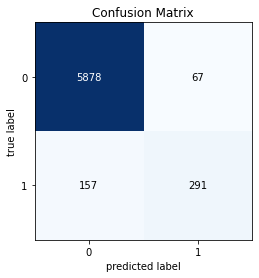

In [28]:
# Confusion-Matrix
cm = confusion_matrix(y_test, prediction)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title("Confusion Matrix")
plt.show()